In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [38]:
df = pd.read_csv('/content/bot_detection_data.csv')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   User ID         50000 non-null  int64 
 1   Username        50000 non-null  object
 2   Tweet           50000 non-null  object
 3   Retweet Count   50000 non-null  int64 
 4   Mention Count   50000 non-null  int64 
 5   Follower Count  50000 non-null  int64 
 6   Verified        50000 non-null  bool  
 7   Bot Label       50000 non-null  int64 
 8   Location        50000 non-null  object
 9   Created At      50000 non-null  object
 10  Hashtags        41659 non-null  object
dtypes: bool(1), int64(5), object(5)
memory usage: 3.9+ MB


In [40]:
print(df.isna().sum())

User ID              0
Username             0
Tweet                0
Retweet Count        0
Mention Count        0
Follower Count       0
Verified             0
Bot Label            0
Location             0
Created At           0
Hashtags          8341
dtype: int64


In [41]:
print(df.isnull().sum())

User ID              0
Username             0
Tweet                0
Retweet Count        0
Mention Count        0
Follower Count       0
Verified             0
Bot Label            0
Location             0
Created At           0
Hashtags          8341
dtype: int64


In [42]:
#adding our own data in missing hastag rows

missing_values_mask=df['Hashtags'].isnull()
#print(missing_values_mask)
df.loc[missing_values_mask,'Hashtags']='No Hashtag'#add No Hashtag at missing cell
print(df['Hashtags'])

0                             No Hashtag
1                              both live
2                            phone ahead
3                     ever quickly new I
4                        foreign mention
                      ...               
49995    teach quality ten education any
49996             add walk among believe
49997            onto admit artist first
49998                               star
49999                               home
Name: Hashtags, Length: 50000, dtype: object


In [43]:
#changing datatype of column 'Created At'

df['Created At']=pd.to_datetime(df['Created At'], format='%Y-%m-%d %H:%M')
print(df['Created At'].dtypes)

datetime64[ns]


In [44]:
df.describe()

,User ID,Retweet Count,Mention Count,Follower Count,Bot Label
count,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,548890.680540,50.00560,2.513760,4988.602380,0.500360
std,259756.681425,29.18116,1.708563,2878.742898,0.500005
min,100025.000000,0.00000,0.000000,0.000000,0.000000
25%,323524.250000,25.00000,1.000000,2487.750000,0.000000
50%,548147.000000,50.00000,3.000000,4991.500000,1.000000
75%,772983.000000,75.00000,4.000000,7471.000000,1.000000
max,999995.000000,100.00000,5.000000,10000.000000,1.000000


In [45]:
df

,User ID,Username,Tweet,Retweet Count,Mention Count,Follower Count,Verified,Bot Label,Location,Created At,Hashtags
0,132131,flong,Station activity person against natural majori...,85,1,2353,False,1,Adkinston,2020-05-11 15:29:50,No Hashtag
1,289683,hinesstephanie,Authority research natural life material staff...,55,5,9617,True,0,Sanderston,2022-11-26 05:18:10,both live
2,779715,roberttran,Manage whose quickly especially foot none to g...,6,2,4363,True,0,Harrisonfurt,2022-08-08 03:16:54,phone ahead
3,696168,pmason,Just cover eight opportunity strong policy which.,54,5,2242,True,1,Martinezberg,2021-08-14 22:27:05,ever quickly new I
4,704441,noah87,Animal sign six data good or.,26,3,8438,False,1,Camachoville,2020-04-13 21:24:21,foreign mention
...,...,...,...,...,...,...,...,...,...,...,...
49995,491196,uberg,Want but put card direction know miss former h...,64,0,9911,True,1,Lake Kimberlyburgh,2023-04-20 11:06:26,teach quality ten education any
49996,739297,jessicamunoz,Provide whole maybe agree church respond most ...,18,5,9900,False,1,Greenbury,2022-10-18 03:57:35,add walk among believe
49997,674475,lynncunningham,Bring different everyone international capital...,43,3,6313,True,1,Deborahfort,2020-07-08 03:54:08,onto admit artist first
49998,167081,richardthompson,Than about single generation itself seek sell ...,45,1,6343,False,0,Stephenside,2022-03-22 12:13:44,star


In [46]:
# List of columns to drop
columns_to_drop = ['User ID', 'Retweet Count', 'Mention Count','Follower Count','Verified','Bot Label','Hashtags']

# Drop the specified columns from the DataFrame
data_dropped = df.drop(columns=columns_to_drop)

# Get value counts for each remaining column
column_counts = {}
for column in data_dropped.columns:
    column_counts[column] = data_dropped[column].value_counts()

# Print the value counts for each column
for column, counts in column_counts.items():
    print(f"Value counts for {column}:")
    print(counts)
    print()



Value counts for Username:
ksmith             21
usmith             16
msmith             16
vmiller            15
ismith             13
                   ..
jessica57           1
ggraham             1
john93              1
gallowaymichael     1
daniel29            1
Name: Username, Length: 40566, dtype: int64

Value counts for Tweet:
Station activity person against natural majority none few size expect six marriage.        1
Institution second billion over song either arm.                                           1
However plan meeting certain dinner card produce wear whether give hour something.         1
Total least today until clear nearly economy book single with successful.                  1
Full likely beautiful example partner process top catch control natural lead push help.    1
                                                                                          ..
News society threat positive someone accept stand pressure life so describe pretty.        1
Station son

In [47]:
#identify inconsistent formatting for textual(categorical too) columns

print(df['Hashtags'].value_counts())


No Hashtag                            8341
area                                    21
big                                     20
treat                                   19
ground                                  18
                                      ... 
president conference field process       1
market live mouth sit wide               1
your five                                1
serious not Democrat                     1
onto admit artist first                  1
Name: Hashtags, Length: 34248, dtype: int64


In [48]:
import matplotlib.pyplot as plt

# Filter data based on bot label
bot_data = df[df['Bot Label'] == 1]
non_bot_data = df[df['Bot Label'] == 0]

<Axes: xlabel='Bot Label', ylabel='count'>

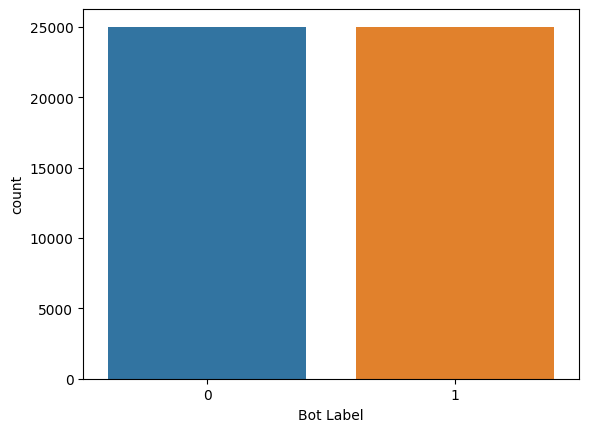

In [49]:
# Visualize the distribution of the target variable
sns.countplot(x='Bot Label', data=df)

In [50]:
bot_followers_stats = bot_data['Follower Count'].describe()
non_bot_followers_stats = non_bot_data['Follower Count'].describe()

bot_retweet_stats = bot_data['Retweet Count'].describe()
non_bot_retweet_stats = non_bot_data['Retweet Count'].describe()

bot_mention_stats = bot_data['Mention Count'].describe()
non_bot_mention_stats = non_bot_data['Mention Count'].describe()


print("Follower Count Statistics:")
print("Bot Accounts:")
print(bot_followers_stats)
print("\nNon-Bot Accounts:")
print(non_bot_followers_stats)

print("\nRetweet Count Statistics:")
print("Bot Accounts:")
print(bot_retweet_stats)
print("\nNon-Bot Accounts:")
print(non_bot_retweet_stats)

print("\nMention Count Statistics:")
print("Bot Accounts:")
print(bot_mention_stats)
print("\nNon-Bot Accounts:")
print(non_bot_mention_stats)


Follower Count Statistics:
Bot Accounts:
count    25018.000000
mean      4991.944280
std       2876.289818
min          0.000000
25%       2497.000000
50%       4978.000000
75%       7468.000000
max      10000.000000
Name: Follower Count, dtype: float64

Non-Bot Accounts:
count    24982.000000
mean      4985.255664
std       2881.251104
min          0.000000
25%       2480.250000
50%       5007.500000
75%       7472.000000
max      10000.000000
Name: Follower Count, dtype: float64

Retweet Count Statistics:
Bot Accounts:
count    25018.000000
mean        50.042050
std         29.171048
min          0.000000
25%         25.000000
50%         50.000000
75%         75.000000
max        100.000000
Name: Retweet Count, dtype: float64

Non-Bot Accounts:
count    24982.000000
mean        49.969098
std         29.191822
min          0.000000
25%         25.000000
50%         50.000000
75%         75.000000
max        100.000000
Name: Retweet Count, dtype: float64

Mention Count Statistics:
Bot

In [51]:
#label encoding of boolean data
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()
df['Verified']=label_encoder.fit_transform(df['Verified'])
df

,User ID,Username,Tweet,Retweet Count,Mention Count,Follower Count,Verified,Bot Label,Location,Created At,Hashtags
0,132131,flong,Station activity person against natural majori...,85,1,2353,0,1,Adkinston,2020-05-11 15:29:50,No Hashtag
1,289683,hinesstephanie,Authority research natural life material staff...,55,5,9617,1,0,Sanderston,2022-11-26 05:18:10,both live
2,779715,roberttran,Manage whose quickly especially foot none to g...,6,2,4363,1,0,Harrisonfurt,2022-08-08 03:16:54,phone ahead
3,696168,pmason,Just cover eight opportunity strong policy which.,54,5,2242,1,1,Martinezberg,2021-08-14 22:27:05,ever quickly new I
4,704441,noah87,Animal sign six data good or.,26,3,8438,0,1,Camachoville,2020-04-13 21:24:21,foreign mention
...,...,...,...,...,...,...,...,...,...,...,...
49995,491196,uberg,Want but put card direction know miss former h...,64,0,9911,1,1,Lake Kimberlyburgh,2023-04-20 11:06:26,teach quality ten education any
49996,739297,jessicamunoz,Provide whole maybe agree church respond most ...,18,5,9900,0,1,Greenbury,2022-10-18 03:57:35,add walk among believe
49997,674475,lynncunningham,Bring different everyone international capital...,43,3,6313,1,1,Deborahfort,2020-07-08 03:54:08,onto admit artist first
49998,167081,richardthompson,Than about single generation itself seek sell ...,45,1,6343,0,0,Stephenside,2022-03-22 12:13:44,star


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   User ID         50000 non-null  int64         
 1   Username        50000 non-null  object        
 2   Tweet           50000 non-null  object        
 3   Retweet Count   50000 non-null  int64         
 4   Mention Count   50000 non-null  int64         
 5   Follower Count  50000 non-null  int64         
 6   Verified        50000 non-null  int64         
 7   Bot Label       50000 non-null  int64         
 8   Location        50000 non-null  object        
 9   Created At      50000 non-null  datetime64[ns]
 10  Hashtags        50000 non-null  object        
dtypes: datetime64[ns](1), int64(6), object(4)
memory usage: 4.2+ MB


<ipython-input-53-33c084d168c9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

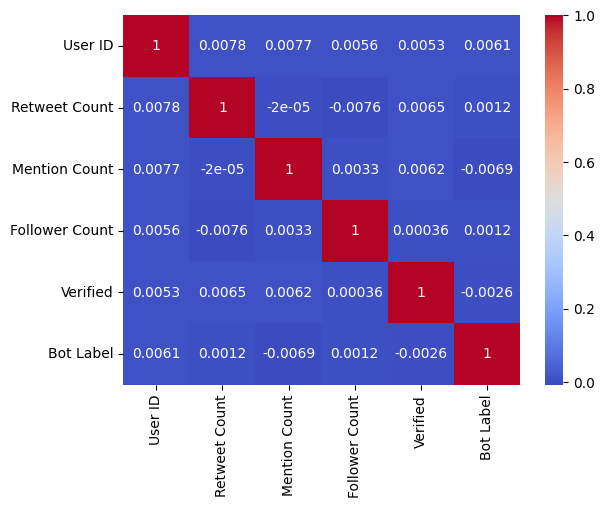

In [53]:
# Check the correlation between the variables
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

<Axes: xlabel='Follower Count'>

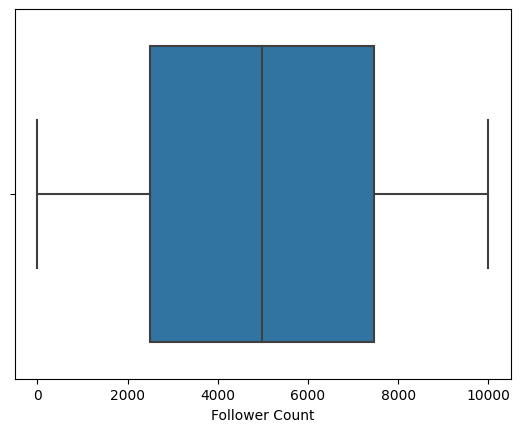

In [54]:
# Check for outliers in the numerical variables
sns.boxplot(x='Follower Count', data=df)

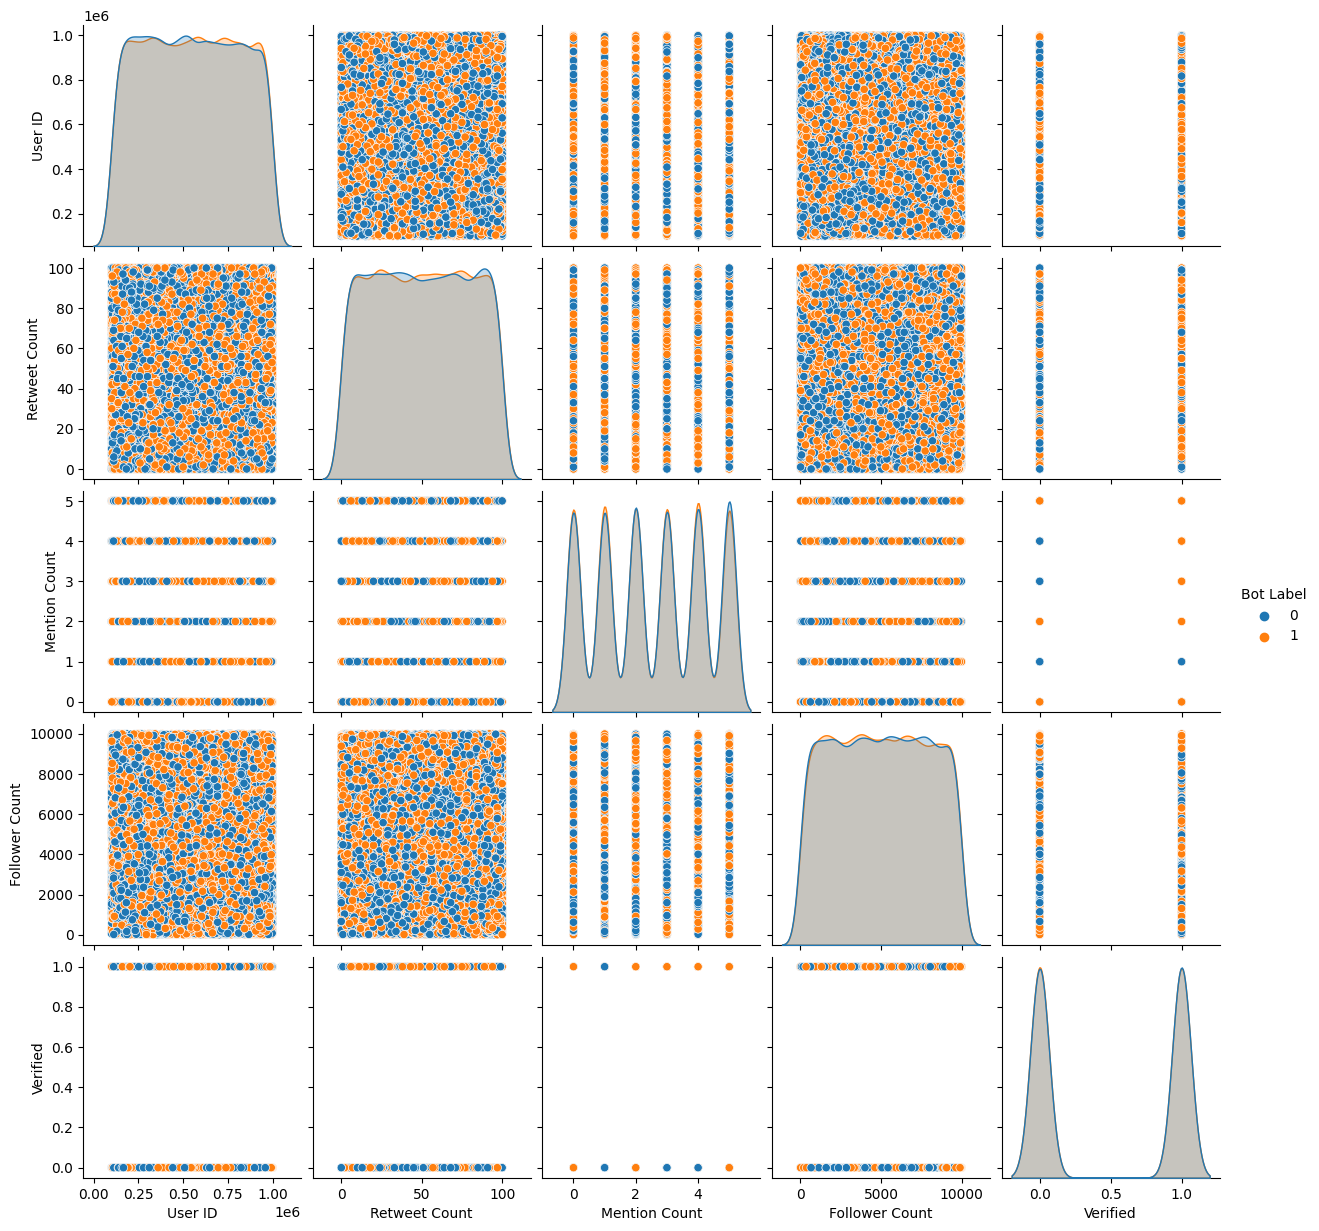

In [55]:
#Check for relationships between variables
sns.pairplot(df, hue='Bot Label')

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
# Combine all text columns into a single Series
text_data = df['Tweet'] + ' ' + df['Username'] + ' ' + df['Hashtags']+' '+df['Location']

# Text vectorization using TF-IDF (sparse representation)
vectorizer = TfidfVectorizer()
text_sparse = vectorizer.fit_transform(text_data)

In [57]:
# Combine text features with additional features

additional_features = df[['Retweet Count', 'Verified','Mention Count','Follower Count','Created At']]

In [58]:
additional_features['Created At'] = additional_features['Created At'].astype(int)  # Convert to Unix timestamp
additional_features = additional_features.astype('float64')  # Convert to float64
text_sparse = text_sparse.astype('float64')

<ipython-input-58-169c9f145ad6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  additional_features['Created At'] = additional_features['Created At'].astype(int)  # Convert to Unix timestamp


In [59]:
text_sparse

<50000x56041 sparse matrix of type '<class 'numpy.float64'>'
	with 740088 stored elements in Compressed Sparse Row format>

In [60]:
combined_sparse = hstack((text_sparse, additional_features))

In [61]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(combined_sparse, df['Bot Label'], test_size=0.2, random_state=42)

In [62]:
from sklearn.preprocessing import StandardScaler
# Scale the training data
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)

# Scale the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [63]:
y_train.value_counts()

0    20014
1    19986
Name: Bot Label, dtype: int64

# Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [65]:
# Make predictions on the testing data
y_pred_rf = rf_classifier.predict(X_test_scaled)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f"Accuracy: {accuracy_rf}")
print(f"Classification Report:\n{report_rf}")


Accuracy: 0.4953
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.54      0.51      4968
           1       0.50      0.45      0.47      5032

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.49     10000
weighted avg       0.50      0.50      0.49     10000



# Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(penalty='l2', random_state=1)
LR.fit(X_train_scaled,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [67]:
y_pred_lr = LR.predict(X_test_scaled)

In [68]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)

print(f"Accuracy: {accuracy_lr}")
print(f"Classification Report:\n{report_lr}")

Accuracy: 0.5022
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.51      0.50      4968
           1       0.51      0.49      0.50      5032

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



# Decision Tree

In [69]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [70]:
y_pred_dt = DT.predict(X_test_scaled)

In [71]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

print(f"Accuracy: {accuracy_dt}")
print(f"Classification Report:\n{report_dt}")

Accuracy: 0.4984
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      4968
           1       0.50      0.49      0.50      5032

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



# SVM

In [72]:
from sklearn.svm import SVC

In [73]:
from sklearn.svm import SVC
svc=SVC(kernel='poly',degree=2,gamma='auto')
svc.fit(X_train_scaled,y_train)

SVC(degree=2, gamma='auto', kernel='poly')

In [74]:
y_pred_svc = svc.predict(X_test_scaled)

In [75]:
accuracy_svc = accuracy_score(y_test, y_pred_svc)
report_svc = classification_report(y_test, y_pred_svc)

print(f"Accuracy: {accuracy_svc}")
print(f"Classification Report:\n{report_svc}")

Accuracy: 0.5019
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.62      0.55      4968
           1       0.51      0.39      0.44      5032

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



# Gradient Boosting

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(X_train_scaled,y_train)

GradientBoostingClassifier()

In [77]:
y_pred_gb = GB.predict(X_test_scaled)

In [78]:
accuracy_gb = accuracy_score(y_test, y_pred_gb)
report_gb = classification_report(y_test, y_pred_gb)

print(f"Accuracy: {accuracy_gb}")
print(f"Classification Report:\n{report_gb}")

Accuracy: 0.5081
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.24      0.33      4968
           1       0.51      0.77      0.61      5032

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.47     10000
weighted avg       0.51      0.51      0.47     10000



# XG Boosting

In [79]:
from xgboost import XGBClassifier
XG = XGBClassifier()
XG.fit(X_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [80]:
y_pred_xg = XG.predict(X_test_scaled)

In [81]:
accuracy_xg = accuracy_score(y_test, y_pred_xg)
report_xg = classification_report(y_test, y_pred_xg)

print(f"Accuracy: {accuracy_xg}")
print(f"Classification Report:\n{report_xg}")

Accuracy: 0.4951
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.44      0.46      4968
           1       0.50      0.55      0.52      5032

    accuracy                           0.50     10000
   macro avg       0.49      0.49      0.49     10000
weighted avg       0.49      0.50      0.49     10000



In [82]:
# Example: Predict labels for new data
from datetime import datetime



# New data (example)

new_data = pd.DataFrame({

    'Tweet': ['Just cover eight opportunity strong policy which.'],

    'Username': ['pmason'],

    'Hashtags': ['neever quickly new Iw'],

    'Retweet Count': [54],

    'Verified': [1],

    'Location' : ['Martinezberg'],

    'Mention Count' : [5],

    'Follower Count' : [2242],

    'Created At' : ['14-08-2021  22:27:00']
})




# Concatenate text features

new_text_data = new_data['Tweet'] + ' ' + new_data['Username'] + ' ' + new_data['Hashtags']+' '+new_data['Location']




# Perform feature vectorization on new text features

new_text_sparse = vectorizer.transform(new_text_data)




# Combine new text features with additional features

new_additional_features = new_data[['Retweet Count', 'Verified','Mention Count','Follower Count','Created At']]



new_additional_features['Created At'] = pd.to_datetime(new_additional_features['Created At'])
new_additional_features['Created At'] = new_additional_features['Created At'].apply(lambda x: int(datetime.timestamp(x)))

# new_additional_features = new_additional_features.astype('float64')


# new_additional_features['Created At'] = new_additional_features['Created At'].astype(int)  # Convert to Unix timestamp
new_additional_features = new_additional_features.astype('float64')

new_combined_sparse = hstack((new_text_sparse, new_additional_features))




# Predict labels for the new data

new_predictions = LR.predict(new_combined_sparse)




# Print the predictions

for i, prediction in enumerate(new_predictions):

    if prediction == 1:

        print(f"Data point {i+1}: Bot")

    else:

        print(f"Data point {i+1}: Not Bot")

Data point 1: Not Bot


<ipython-input-82-d157d52529a7>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_additional_features['Created At'] = pd.to_datetime(new_additional_features['Created At'])
<ipython-input-82-d157d52529a7>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_additional_features['Created At'] = new_additional_features['Created At'].apply(lambda x: int(datetime.timestamp(x)))
